In [2]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
dp_info_ds = load_dataset("tongyx361/MathInstruct-Core-DifficultyAware")
print(dp_info_ds)

Generating train split:   0%|          | 0/168810 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['instruction', 'source', 'difficulty_level', 'output', 'err_rate'],
        num_rows: 168810
    })
})


In [6]:
dp_info_df = dp_info_ds["train"].to_pandas()
print(dp_info_df)

                                              instruction  \
0       It takes Jennifer 20 minutes to groom each of ...   
1       On average, Machine A will produce a completed...   
2       A circular spinner for a game has a radius of ...   
3       Find the number of square units in the area of...   
4       Find the average of all prime numbers between ...   
...                                                   ...   
168805  A house wife saved $2.75 in buying an item on ...   
168806  A train 220 m long passed a pole in 12 sec. Ho...   
168807  If a coin is tossed twice what is the probabil...   
168808  In a group of ducks and cows, the total number...   
168809  By mixing two brands of coffee and selling the...   

                          source  difficulty_level  \
0         data/PoT/gsm_gpt4.json                 4   
1         data/CoT/aqua_rat.json                 3   
2       data/CoT/MATH_train.json                 5   
3       data/CoT/MATH_train.json                 5 

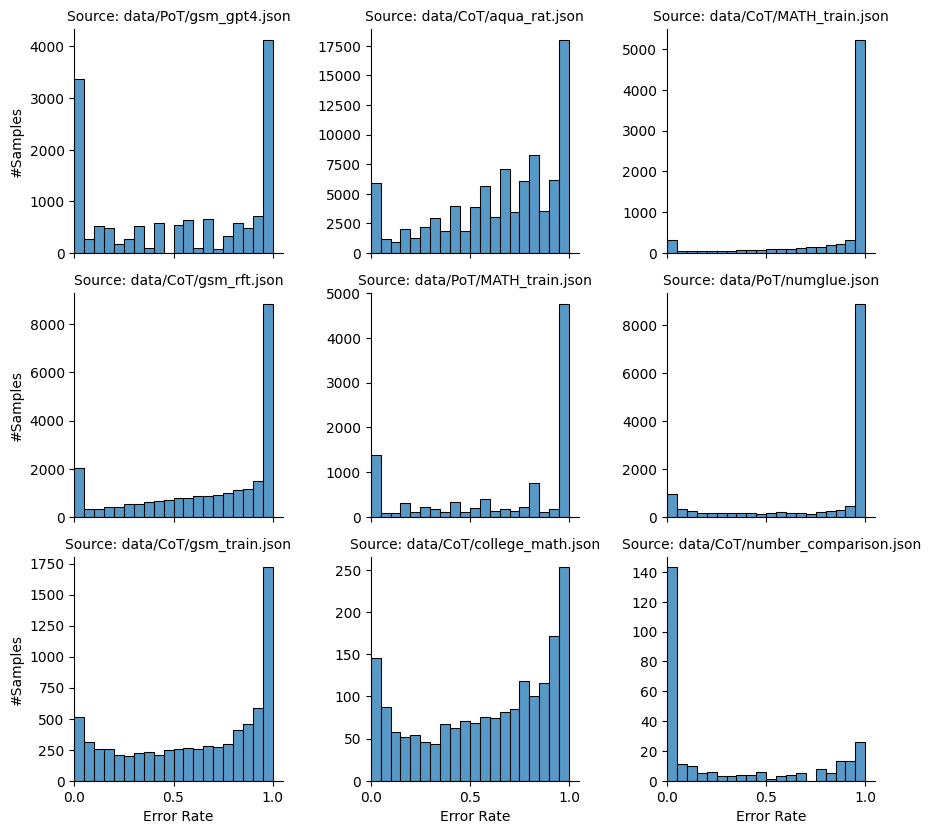

In [11]:
# Create a FacetGrid to analyze the distribution for each 'source'
g = sns.FacetGrid(dp_info_df, col="source", col_wrap=3, sharex=True, sharey=False)
g = g.map(sns.histplot, "err_rate", bins=np.arange(0, 1.05, 0.05), kde=False)

# Adjusting plot titles and labels
g.set_titles("Source: {col_name}")
g.set_axis_labels("Error Rate", "#Samples")
plt.subplots_adjust(top=0.9)

# Set the limit of x-axis to start from 0
g.set(xlim=(0, None))

plt.show()
# plt.savefig("dp-dist.pdf", bbox_inches="tight")